In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
latest_entry = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_entry

'2017-08-23'

<Figure size 1000x1000 with 0 Axes>

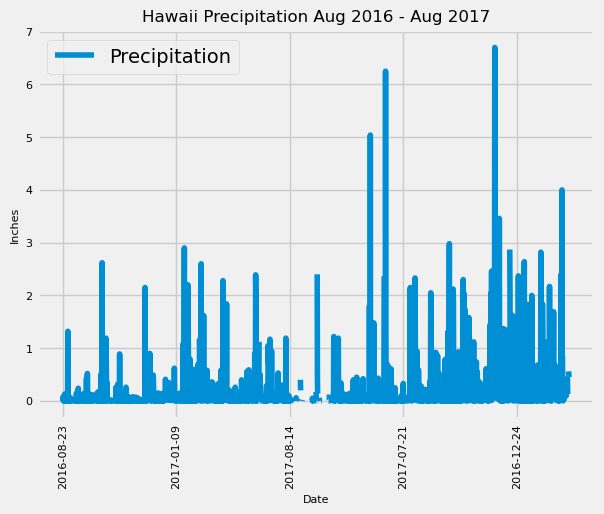

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_months = dt.date(2017,8,23)- dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
last_twelve_months

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['date', 'prcp'])

# Sort the dataframe by date
df.set_index(df['date'], inplace = True)
df.head()


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,10))
df.plot('date', 'prcp')
plt.xlabel("Date", size = 8)
plt.ylabel("Inches", size = 8)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 12)
plt.legend(["Precipitation"],loc='upper left')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.savefig("Precipitation.png")
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(hawaii_Station.id).count()

9

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations[0][0]
print("The most active station id is ",most_active_station,".")

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station).all()

The most active station id is  USC00519281 .


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

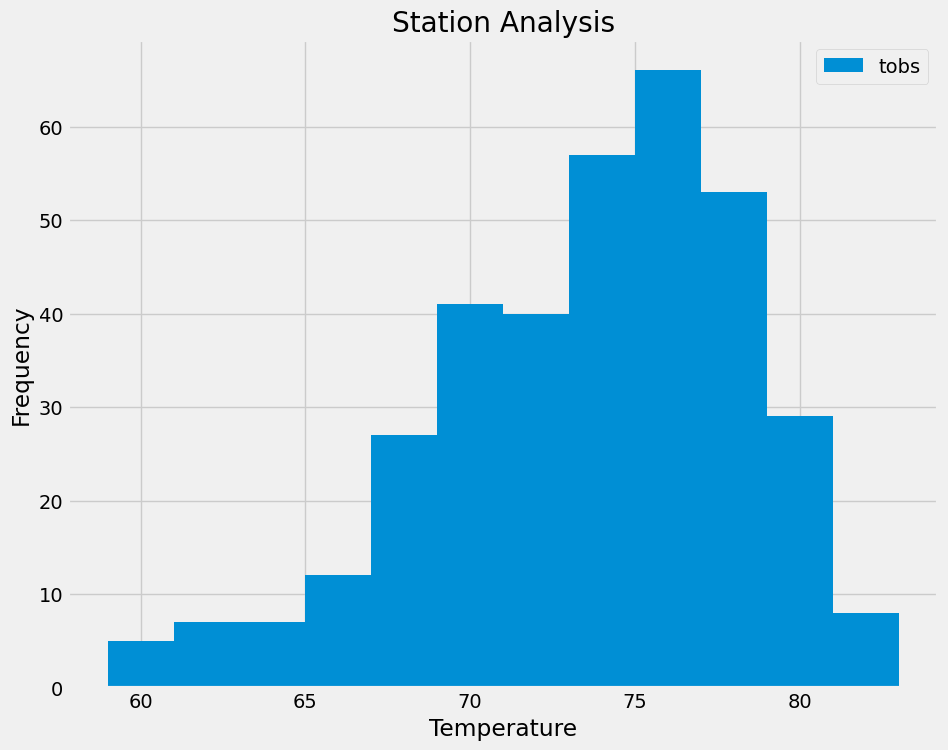

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12months = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

station_temp_df = pd.DataFrame(data=last_12months).set_index('date')
station_temp_df 

plt.figure(figsize=(10,8))
plt.hist(station_temp_df ['tobs'], bins = 12)
# plt.grid()
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.savefig("Station analysis.png")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()